In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as col
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
!pip install jovian opendatasets --upgrade --quiet
!pip install -q kaggle
import urllib.request
import opendatasets as opd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
opd.download('https://www.kaggle.com/datasets/suraj520/telecom-churn-dataset', force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ayojerusalemakinremi
Your Kaggle Key: ··········


100%|██████████| 5.23M/5.23M [00:00<00:00, 100MB/s]

In [4]:
df = pd.read_csv(r'telecom-churn-dataset/telecom_churn.csv')

In [5]:
df.head(10)

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
5,6,Vodafone,M,36,Uttarakhand,Chennai,120612,2020-01-01,1,73452,91,24,8109,0
6,7,BSNL,F,60,Karnataka,Delhi,609616,2020-01-01,1,110035,36,13,8512,0
7,8,BSNL,M,46,Arunachal Pradesh,Kolkata,866786,2020-01-01,4,104541,87,40,2245,1
8,9,Reliance Jio,F,53,Himachal Pradesh,Mumbai,765257,2020-01-01,2,79439,34,12,10039,0
9,10,BSNL,F,57,Rajasthan,Mumbai,506308,2020-01-01,0,126422,61,33,567,0


In [6]:
df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [7]:
df.dtypes

customer_id              int64
telecom_partner         object
gender                  object
age                      int64
state                   object
city                    object
pincode                  int64
date_of_registration    object
num_dependents           int64
estimated_salary         int64
calls_made               int64
sms_sent                 int64
data_used                int64
churn                    int64
dtype: object

In [8]:
df.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

<ipython-input-9-0a0dae9537b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Reds')


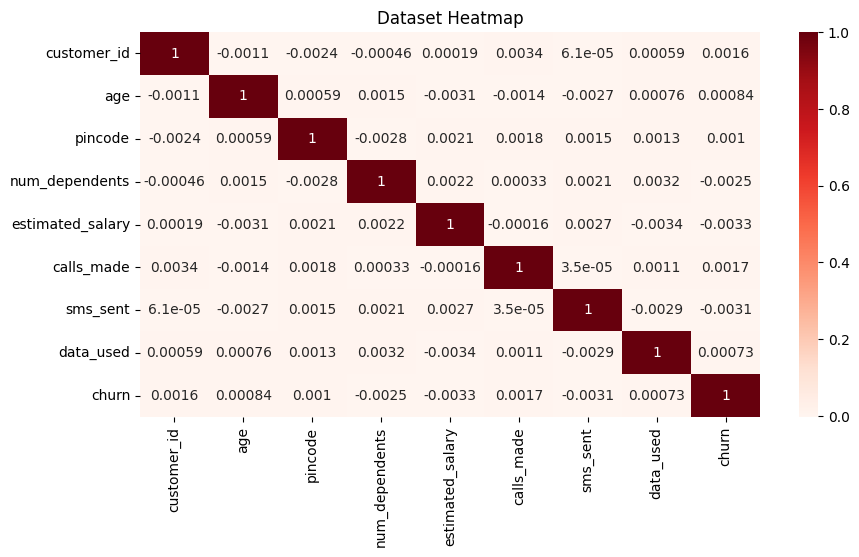

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.title("Dataset Heatmap")
plt.show()

In [10]:
df.drop('state', axis=1, inplace=True)

In [11]:
df.sample(10)

,customer_id,telecom_partner,gender,age,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
165503,165504,Reliance Jio,M,51,Mumbai,342772,2022-04-08,3,23168,47,30,6888,0
177574,177575,BSNL,F,18,Kolkata,273974,2022-06-07,2,145614,52,44,6422,1
33273,33274,Reliance Jio,F,33,Hyderabad,686645,2020-06-15,3,148437,69,22,8487,0
225108,225109,BSNL,F,55,Kolkata,305837,2023-01-31,3,55850,83,24,8309,0
88485,88486,BSNL,M,22,Chennai,687152,2021-03-18,0,89400,62,41,3368,0
24766,24767,Reliance Jio,M,65,Hyderabad,151363,2020-05-03,2,128819,43,17,860,0
74526,74527,Vodafone,F,63,Chennai,415888,2021-01-08,1,32907,27,0,2787,1
218579,218580,Reliance Jio,M,25,Hyderabad,705544,2022-12-30,4,149762,96,42,7782,0
117777,117778,Reliance Jio,M,19,Hyderabad,167108,2021-08-12,0,111545,18,8,8440,0
213849,213850,Vodafone,M,24,Mumbai,110851,2022-12-06,4,76310,101,9,2099,0


In [12]:
df['telecom_partner'].unique()

array(['Reliance Jio', 'Vodafone', 'BSNL', 'Airtel'], dtype=object)

In [13]:
tp_counts = df['telecom_partner'].value_counts()
tp_counts

Reliance Jio    61123
Airtel          60905
Vodafone        60802
BSNL            60723
Name: telecom_partner, dtype: int64

In [14]:
theme = ['#00195c', '#700e0e', '#0a3e02', '#67074e']

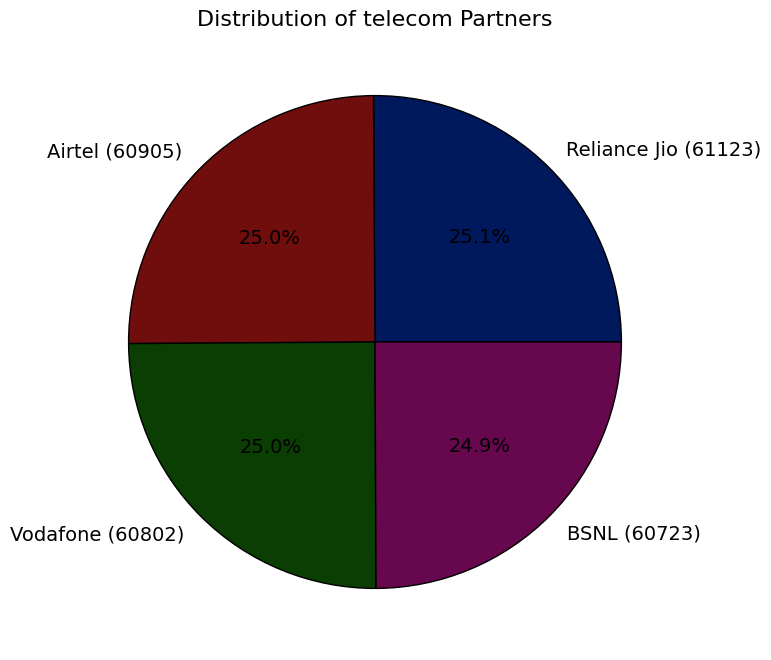

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(tp_counts, labels=[f'{partner} ({count})' for partner, count in tp_counts.items()],
        autopct='%1.1f%%', colors = theme, wedgeprops= {'linewidth' : 1, 'edgecolor' : 'black'}, textprops=
        {'fontsize' : 14}, startangle=0)
plt.title("Distribution of telecom Partners", fontsize=16)
plt.show()

In [16]:
df['city'].unique()


array(['Kolkata', 'Mumbai', 'Delhi', 'Chennai', 'Hyderabad', 'Bangalore'],
      dtype=object)

**Telecom** analysis with users in the city

In [17]:
city_users = df['city'].value_counts()
city_users

Chennai      40749
Hyderabad    40698
Kolkata      40661
Bangalore    40603
Delhi        40456
Mumbai       40386
Name: city, dtype: int64

Grouping the data by "city" and "telecom_partmers"

In [18]:
df_tele = df[['city', 'telecom_partner']]
city_tel_ct = df_tele.groupby(['city', 'telecom_partner']).size().unstack(fill_value=0)

In [19]:
city_tel_ct

telecom_partner,Airtel,BSNL,Reliance Jio,Vodafone
city,,,,
Bangalore,10029,10210,10326,10038
Chennai,10378,10063,10273,10035
Delhi,10057,10076,10100,10223
Hyderabad,10227,10122,10224,10125
Kolkata,10141,10186,10169,10165
Mumbai,10073,10066,10031,10216


In [20]:
Avg_city = city_tel_ct.mean(axis=1)
Avg_city

city
Bangalore    10150.75
Chennai      10187.25
Delhi        10114.00
Hyderabad    10174.50
Kolkata      10165.25
Mumbai       10096.50
dtype: float64

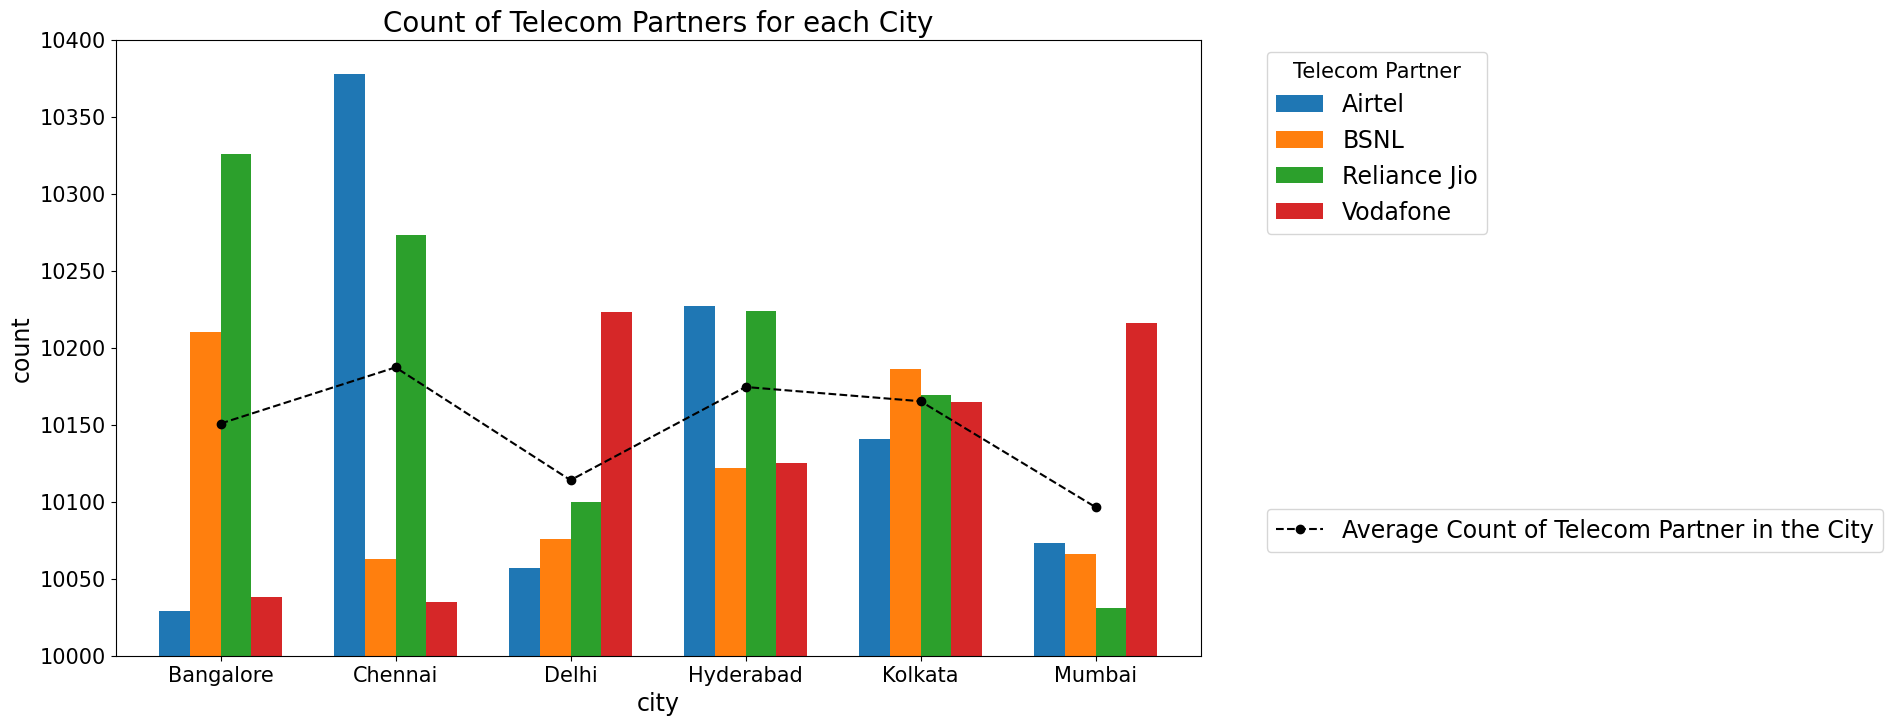

In [21]:
city_tel_ct.plot(kind= 'bar', figsize=(14, 8), width=0.7)
plt.title("Count of Telecom Partners for each City", fontsize=20)
plt.xlabel("city", fontsize=17)
plt.ylabel("count", fontsize=17)
legend1= plt.legend(title='Telecom Partner', title_fontsize=15, bbox_to_anchor=(1.05, 1), loc='upper left',
fontsize=17)
plt.ylim(10000, 10400)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

plt.plot(Avg_city.index, Avg_city.values, marker='o', linestyle="--", color='black')
legend2 = plt.legend(handles=[plt.Line2D([0], [0], marker='o', linestyle="--", color='black',
                     label='Average Count of Telecom Partner in the City')], bbox_to_anchor=(1.05, 0.15),
                     loc='lower left', fontsize=17)
plt.gca().add_artist(legend1)
plt.show()

**Call** **distribution** **by** **different** **Telecom** **partners** **in** **various** **cities**.

In [22]:
df_call = df[['calls_made', 'telecom_partner', 'city']]
call_city = df_call.groupby(['city', 'telecom_partner'])['calls_made'].sum().unstack(fill_value=0)

In [23]:
call_city.reset_index()
call_city

telecom_partner,Airtel,BSNL,Reliance Jio,Vodafone
city,,,,
Bangalore,493322,504271,507452,493366
Chennai,510686,492927,502371,493394
Delhi,497124,489038,498284,495066
Hyderabad,497176,498416,501336,493205
Kolkata,496839,498258,499821,492245
Mumbai,490689,494845,497886,498649


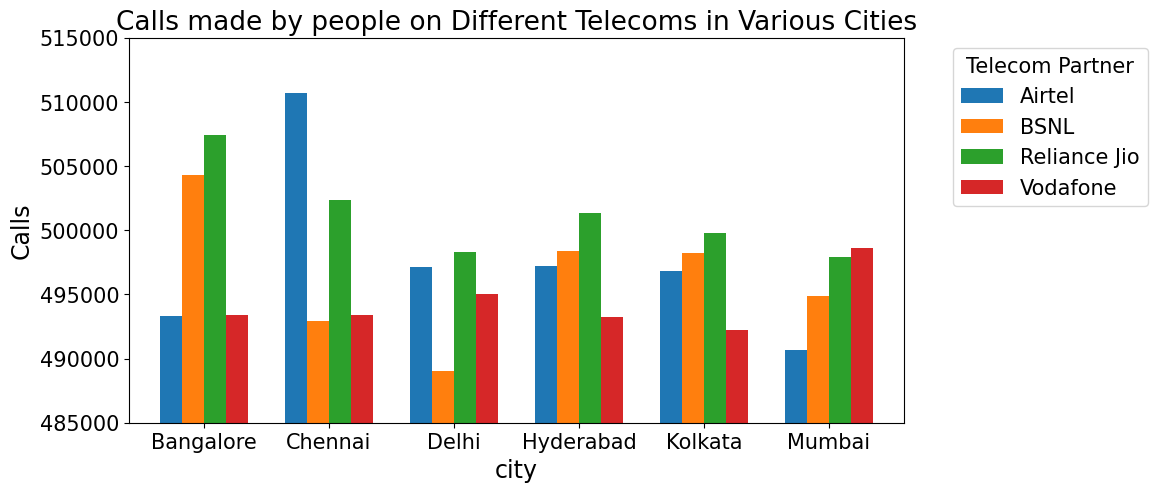

In [24]:
call_city.plot(kind='bar', figsize=(10, 5), width=0.7)
plt.title("Calls made by people on Different Telecoms in Various Cities", fontsize=19)
plt.xlabel("city", fontsize=17)
plt.ylabel("Calls", fontsize=17)
plt.legend(title='Telecom Partner', title_fontsize=15, bbox_to_anchor=(1.05, 1),
           loc='upper left', fontsize=15)
plt.ylim(485000, 515000)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [25]:
df

,customer_id,telecom_partner,gender,age,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,Airtel,F,28,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0


In [26]:
df['Date'] = pd.to_datetime(df['date_of_registration'])
df['Year_of_registration'] = df['Date'].dt.strftime('%Y')
df.drop(['date_of_registration', 'Date'], axis=1, inplace=True)

In [27]:
df

,customer_id,telecom_partner,gender,age,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,Year_of_registration
0,1,Reliance Jio,F,25,Kolkata,755597,4,124962,44,45,-361,0,2020
1,2,Reliance Jio,F,55,Mumbai,125926,2,130556,62,39,5973,0,2020
2,3,Vodafone,F,57,Delhi,423976,0,148828,49,24,193,1,2020
3,4,BSNL,M,46,Kolkata,522841,1,38722,80,25,9377,1,2020
4,5,BSNL,F,26,Delhi,740247,2,55098,78,15,1393,0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,Airtel,F,28,Kolkata,110295,3,130580,28,9,4102,0,2023
243549,243550,Reliance Jio,F,52,Kolkata,713481,0,82393,80,45,7521,0,2023
243550,243551,Reliance Jio,M,59,Kolkata,520218,4,51298,26,4,6547,0,2023
243551,243552,BSNL,M,49,Kolkata,387744,2,83981,80,15,1125,0,2023


**Analysing** **Churn** **distribution** **by** **data** **usage**

In [28]:
churn1 = df[df['churn']==1]
churn0 = df[df['churn']==0]

In [29]:
churn1.head()

,customer_id,telecom_partner,gender,age,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,Year_of_registration
2,3,Vodafone,F,57,Delhi,423976,0,148828,49,24,193,1,2020
3,4,BSNL,M,46,Kolkata,522841,1,38722,80,25,9377,1,2020
7,8,BSNL,M,46,Kolkata,866786,4,104541,87,40,2245,1,2020
10,11,Airtel,M,44,Chennai,776250,0,133288,7,7,1275,1,2020
16,17,Vodafone,M,61,Hyderabad,734068,2,59723,16,42,8157,1,2020


In [30]:
churn0.head()

,customer_id,telecom_partner,gender,age,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,Year_of_registration
0,1,Reliance Jio,F,25,Kolkata,755597,4,124962,44,45,-361,0,2020
1,2,Reliance Jio,F,55,Mumbai,125926,2,130556,62,39,5973,0,2020
4,5,BSNL,F,26,Delhi,740247,2,55098,78,15,1393,0,2020
5,6,Vodafone,M,36,Chennai,120612,1,73452,91,24,8109,0,2020
6,7,BSNL,F,60,Delhi,609616,1,110035,36,13,8512,0,2020


**Grouping** **and** **calculation** **the** **amount** **of** **churns** **per** **year**

In [31]:
churn1_= churn1.groupby('Year_of_registration')['data_used'].sum()
churn0_= churn0.groupby('Year_of_registration')['data_used'].sum()

In [32]:
churn1_, churn0_

(Year_of_registration
 2020    73431027
 2021    73151082
 2022    72866317
 2023    24563799
 Name: data_used, dtype: int64,
 Year_of_registration
 2020    292443177
 2021    289319259
 2022    291444964
 2023     98885811
 Name: data_used, dtype: int64)

In [33]:
churn1_/=10**8
churn1_

Year_of_registration
2020    0.734310
2021    0.731511
2022    0.728663
2023    0.245638
Name: data_used, dtype: float64

In [34]:
churn0_/=10**8
churn0_

Year_of_registration
2020    2.924432
2021    2.893193
2022    2.914450
2023    0.988858
Name: data_used, dtype: float64

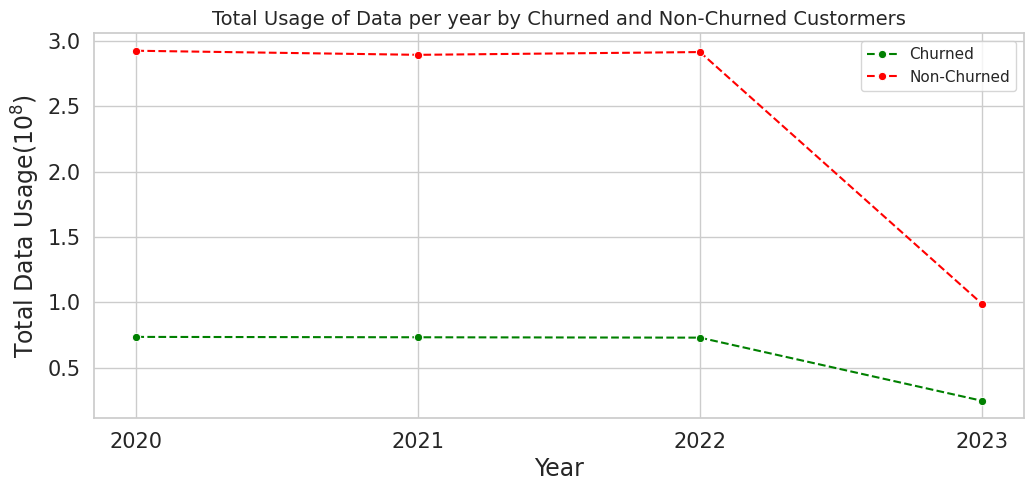

In [35]:
plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")
sns.lineplot(data=churn1_, marker='o', linestyle='--', color = 'green', label="Churned")
sns.lineplot(data=churn0_, marker='o', linestyle='--', color = 'red', label="Non-Churned")
plt.title("Total Usage of Data per year by Churned and Non-Churned Custormers", fontsize=14)
plt.xlabel("Year", fontsize=17)
plt.ylabel("Total Data Usage($10^{8}$)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

**SMS** **Distribution** **by** **different** **Telecoms** **in** **various** **cities**

In [36]:
df_sms = df[['sms_sent', 'telecom_partner', 'city']]
sms = df_sms.groupby(['city', 'telecom_partner'])['sms_sent'].sum().unstack(fill_value=0)

In [37]:
sms.reset_index()
sms

telecom_partner,Airtel,BSNL,Reliance Jio,Vodafone
city,,,,
Bangalore,241202,244092,247988,239713
Chennai,247291,241506,245299,239428
Delhi,238677,242035,243645,243013
Hyderabad,243619,241360,242963,242398
Kolkata,242458,244091,244791,245004
Mumbai,242710,242522,242415,243755


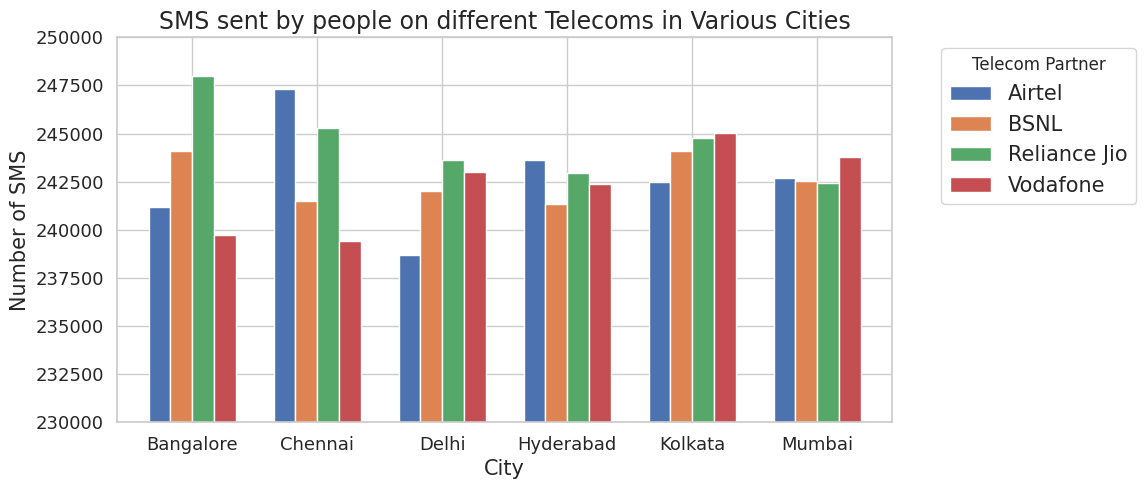

In [38]:
sms.plot(kind='bar', figsize=(10, 5), width=0.7)
plt.title("SMS sent by people on different Telecoms in Various Cities", fontsize=17)
plt.xlabel("City", fontsize=15)
plt.ylabel("Number of SMS", fontsize=15)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title='Telecom Partner', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
plt.ylim(230000, 250000)
plt.show()

In [39]:
df.head()

,customer_id,telecom_partner,gender,age,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,Year_of_registration
0,1,Reliance Jio,F,25,Kolkata,755597,4,124962,44,45,-361,0,2020
1,2,Reliance Jio,F,55,Mumbai,125926,2,130556,62,39,5973,0,2020
2,3,Vodafone,F,57,Delhi,423976,0,148828,49,24,193,1,2020
3,4,BSNL,M,46,Kolkata,522841,1,38722,80,25,9377,1,2020
4,5,BSNL,F,26,Delhi,740247,2,55098,78,15,1393,0,2020


Churn Distribution on Estimated Average Salary(depending on "The number of dependents on that custommer")

In [47]:
Avg_salary_by_dep_churn = df.groupby(['num_dependents', 'churn'])['estimated_salary'].mean().reset_index()
Avg_salary_by_dep_churn

,num_dependents,churn,estimated_salary
0,0,0,85218.793374
1,0,1,83950.236970
2,1,0,84915.535797
3,1,1,84620.616709
4,2,0,85012.765700
5,2,1,85191.333059
6,3,0,85245.176517
7,3,1,84646.045002
8,4,0,85025.179078
9,4,1,85463.088522


In [48]:
min(Avg_salary_by_dep_churn['estimated_salary'])

83950.23696969697

In [51]:
colors = ['#741838', '#6d3ee4']

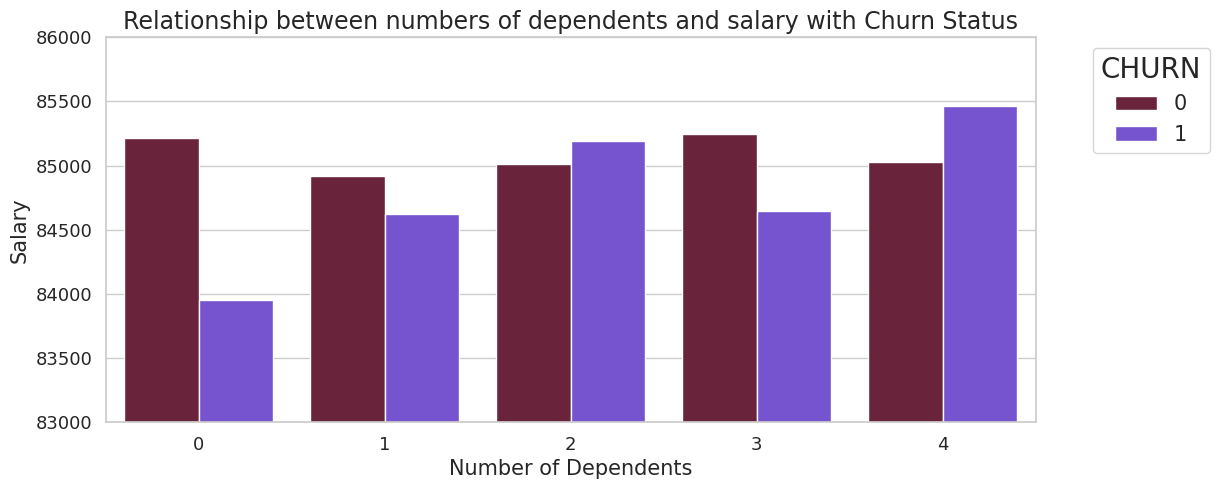

In [52]:
plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")
sns.barplot(data=Avg_salary_by_dep_churn, x='num_dependents',
            y='estimated_salary', hue='churn', palette = colors)
plt.title("Relationship between numbers of dependents and salary with Churn Status", fontsize=17)
plt.xlabel("Number of Dependents", fontsize=15)
plt.ylabel("Salary", fontsize=15)
plt.legend(title="CHURN", bbox_to_anchor=(1.05, 1),
           loc='upper left', fontsize=15, title_fontsize=20)
plt.ylim(83000, 86000)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [53]:
df.head()

,customer_id,telecom_partner,gender,age,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,Year_of_registration
0,1,Reliance Jio,F,25,Kolkata,755597,4,124962,44,45,-361,0,2020
1,2,Reliance Jio,F,55,Mumbai,125926,2,130556,62,39,5973,0,2020
2,3,Vodafone,F,57,Delhi,423976,0,148828,49,24,193,1,2020
3,4,BSNL,M,46,Kolkata,522841,1,38722,80,25,9377,1,2020
4,5,BSNL,F,26,Delhi,740247,2,55098,78,15,1393,0,2020


Churn depending on Age

In [54]:
lim = df['age'].max()
a = lim//10
age_bins = range(0, (a+1)*10, 10)
age_bins

range(0, 80, 10)

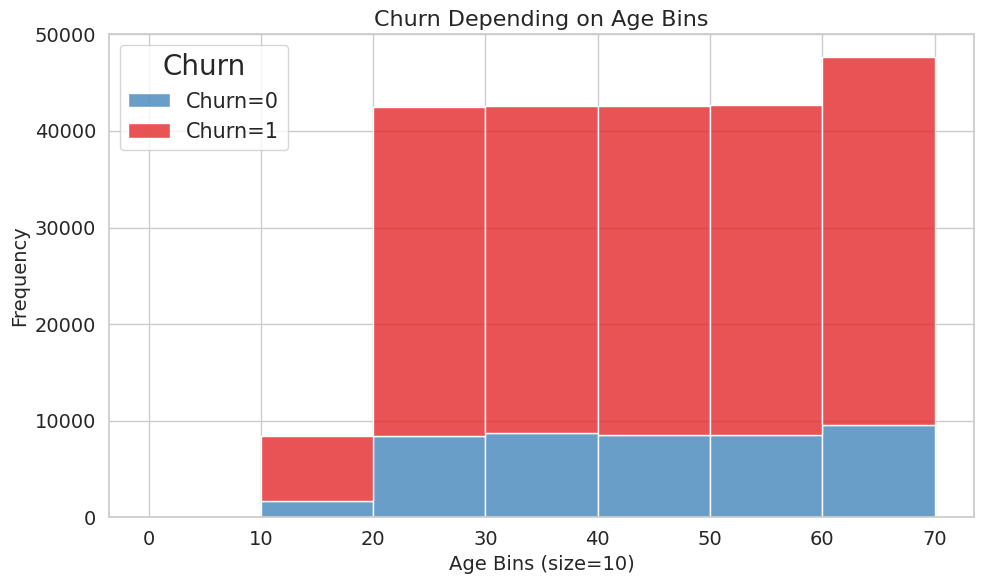

In [55]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(data=df, x='age', bins = age_bins, hue='churn', multiple='stack', palette='Set1')
plt.title("Churn Depending on Age Bins", fontsize=16)
plt.xlabel("Age Bins (size=10)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(title="Churn", labels=['Churn=0', 'Churn=1'],
           loc='upper left', fontsize=15, title_fontsize=20)
plt.xticks(age_bins, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [56]:
df.head()

,customer_id,telecom_partner,gender,age,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,Year_of_registration
0,1,Reliance Jio,F,25,Kolkata,755597,4,124962,44,45,-361,0,2020
1,2,Reliance Jio,F,55,Mumbai,125926,2,130556,62,39,5973,0,2020
2,3,Vodafone,F,57,Delhi,423976,0,148828,49,24,193,1,2020
3,4,BSNL,M,46,Kolkata,522841,1,38722,80,25,9377,1,2020
4,5,BSNL,F,26,Delhi,740247,2,55098,78,15,1393,0,2020


In [57]:
#Binary encoding for Gender
encoded_gender = pd.get_dummies(df['gender'], prefix='Gender')
encoded_gender

,Gender_F,Gender_M
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
243548,1,0
243549,1,0
243550,0,1
243551,0,1


In [58]:
#One-hot encoding for City and Telecom Partner
encoded_city = pd.get_dummies(df['city'], prefix='city')
encoded_telecom = pd.get_dummies(df['telecom_partner'], prefix='telecom_partner')

In [59]:
encoded_city

,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
243548,0,0,0,0,1,0
243549,0,0,0,0,1,0
243550,0,0,0,0,1,0
243551,0,0,0,0,1,0


In [60]:
encoded_telecom

,telecom_partner_Airtel,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
243548,1,0,0,0
243549,0,0,1,0
243550,0,0,1,0
243551,0,1,0,0


In [62]:
#Concat the dataframme for the final dataset
df_enc = pd.concat([df, encoded_city, encoded_gender, encoded_telecom], axis=1)

#Drop the original categorical columms
df_enc.drop(['telecom_partner', 'gender', 'city'], axis=1, inplace=True)

In [63]:
df_enc

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,Year_of_registration,...,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,Gender_F,Gender_M,telecom_partner_Airtel,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone
0,1,25,755597,4,124962,44,45,-361,0,2020,...,0,0,1,0,1,0,0,0,1,0
1,2,55,125926,2,130556,62,39,5973,0,2020,...,0,0,0,1,1,0,0,0,1,0
2,3,57,423976,0,148828,49,24,193,1,2020,...,1,0,0,0,1,0,0,0,0,1
3,4,46,522841,1,38722,80,25,9377,1,2020,...,0,0,1,0,0,1,0,1,0,0
4,5,26,740247,2,55098,78,15,1393,0,2020,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,28,110295,3,130580,28,9,4102,0,2023,...,0,0,1,0,1,0,1,0,0,0
243549,243550,52,713481,0,82393,80,45,7521,0,2023,...,0,0,1,0,1,0,0,0,1,0
243550,243551,59,520218,4,51298,26,4,6547,0,2023,...,0,0,1,0,0,1,0,0,1,0
243551,243552,49,387744,2,83981,80,15,1125,0,2023,...,0,0,1,0,0,1,0,1,0,0


In [64]:
#encoded_Year
encoded_year = pd.get_dummies(df['Year_of_registration'], prefix='Year')
encoded_year

,Year_2020,Year_2021,Year_2022,Year_2023
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
243548,0,0,0,1
243549,0,0,0,1
243550,0,0,0,1
243551,0,0,0,1


In [65]:
df_enc = pd.concat([df_enc, encoded_year], axis=1)
df_enc.drop('Year_of_registration', axis=1, inplace=True)
df_enc

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,city_Bangalore,...,Gender_F,Gender_M,telecom_partner_Airtel,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone,Year_2020,Year_2021,Year_2022,Year_2023
0,1,25,755597,4,124962,44,45,-361,0,0,...,1,0,0,0,1,0,1,0,0,0
1,2,55,125926,2,130556,62,39,5973,0,0,...,1,0,0,0,1,0,1,0,0,0
2,3,57,423976,0,148828,49,24,193,1,0,...,1,0,0,0,0,1,1,0,0,0
3,4,46,522841,1,38722,80,25,9377,1,0,...,0,1,0,1,0,0,1,0,0,0
4,5,26,740247,2,55098,78,15,1393,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,28,110295,3,130580,28,9,4102,0,0,...,1,0,1,0,0,0,0,0,0,1
243549,243550,52,713481,0,82393,80,45,7521,0,0,...,1,0,0,0,1,0,0,0,0,1
243550,243551,59,520218,4,51298,26,4,6547,0,0,...,0,1,0,0,1,0,0,0,0,1
243551,243552,49,387744,2,83981,80,15,1125,0,0,...,0,1,0,1,0,0,0,0,0,1


In [66]:
df_enc.dtypes

customer_id                     int64
age                             int64
pincode                         int64
num_dependents                  int64
estimated_salary                int64
calls_made                      int64
sms_sent                        int64
data_used                       int64
churn                           int64
city_Bangalore                  uint8
city_Chennai                    uint8
city_Delhi                      uint8
city_Hyderabad                  uint8
city_Kolkata                    uint8
city_Mumbai                     uint8
Gender_F                        uint8
Gender_M                        uint8
telecom_partner_Airtel          uint8
telecom_partner_BSNL            uint8
telecom_partner_Reliance Jio    uint8
telecom_partner_Vodafone        uint8
Year_2020                       uint8
Year_2021                       uint8
Year_2022                       uint8
Year_2023                       uint8
dtype: object

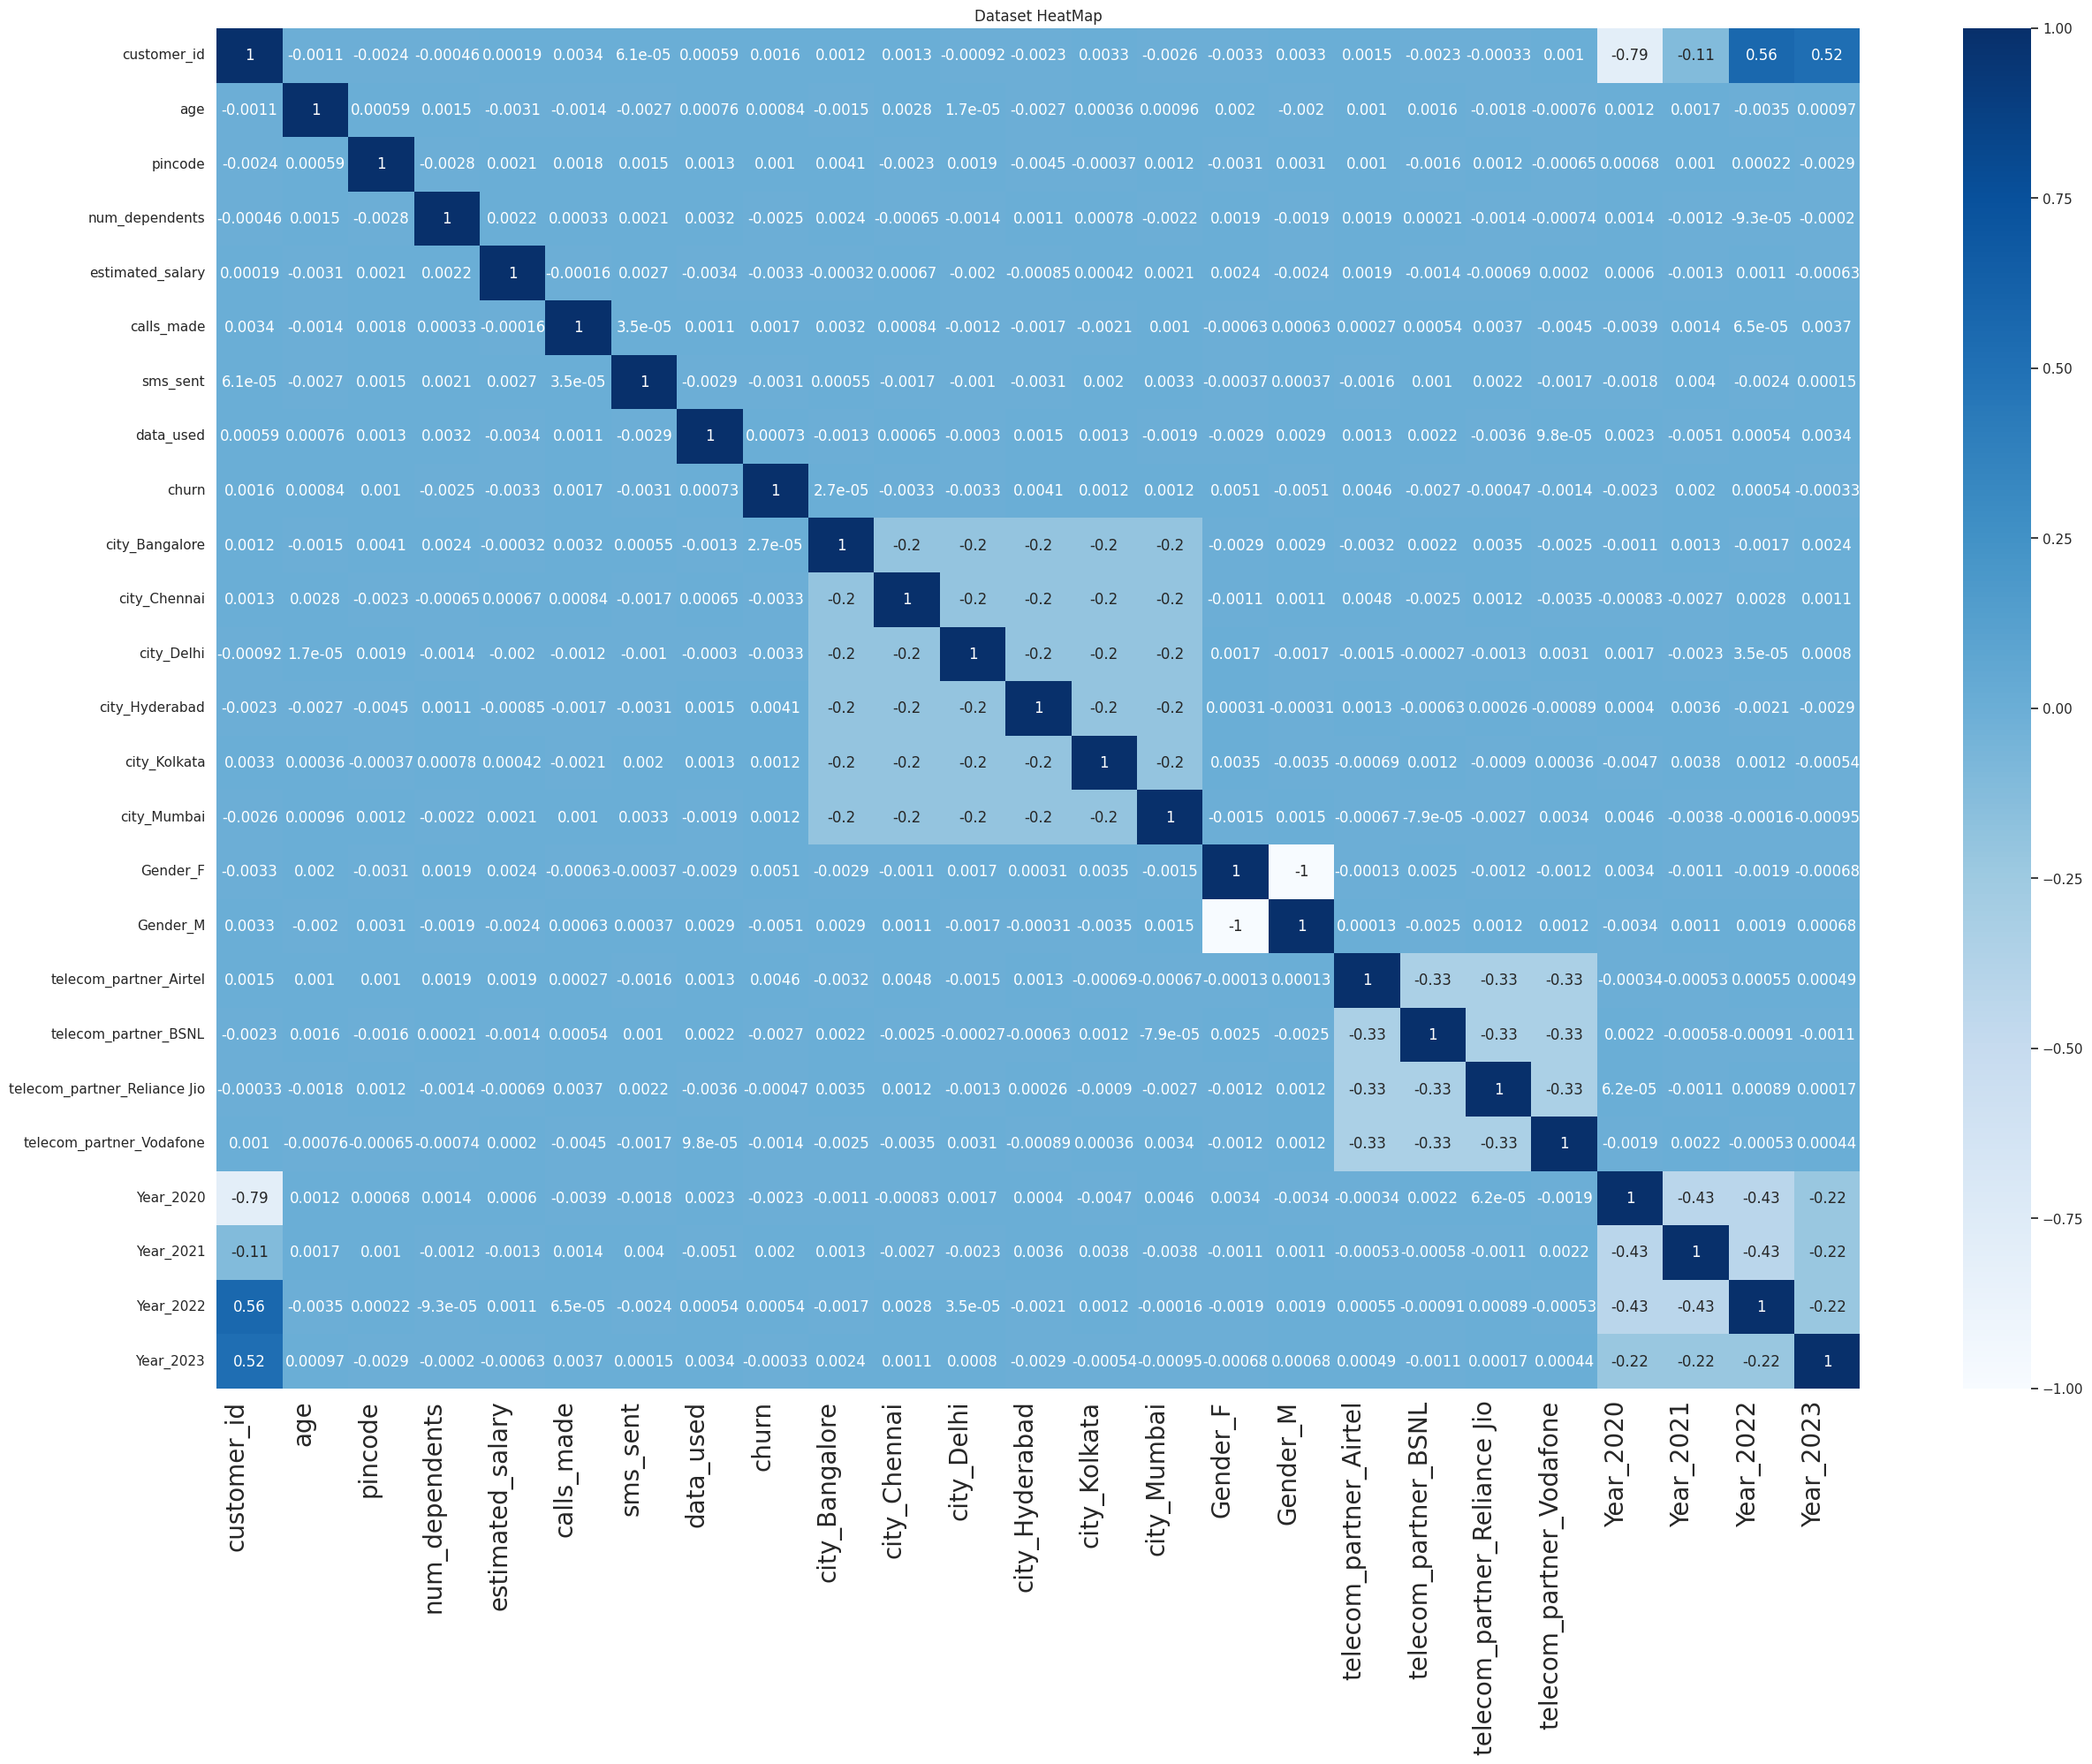

In [67]:
plt.figure(figsize=(30, 20))
sns.heatmap(df_enc.corr(), annot=True, cmap='Blues')
plt.title("Dataset HeatMap")
plt.xticks(ha='right', fontsize=20)
plt.xticks(fontsize=20)
plt.show()

Building the Model

In [68]:
x = df_enc.drop('churn', axis=1)
x

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,city_Bangalore,city_Chennai,...,Gender_F,Gender_M,telecom_partner_Airtel,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone,Year_2020,Year_2021,Year_2022,Year_2023
0,1,25,755597,4,124962,44,45,-361,0,0,...,1,0,0,0,1,0,1,0,0,0
1,2,55,125926,2,130556,62,39,5973,0,0,...,1,0,0,0,1,0,1,0,0,0
2,3,57,423976,0,148828,49,24,193,0,0,...,1,0,0,0,0,1,1,0,0,0
3,4,46,522841,1,38722,80,25,9377,0,0,...,0,1,0,1,0,0,1,0,0,0
4,5,26,740247,2,55098,78,15,1393,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,28,110295,3,130580,28,9,4102,0,0,...,1,0,1,0,0,0,0,0,0,1
243549,243550,52,713481,0,82393,80,45,7521,0,0,...,1,0,0,0,1,0,0,0,0,1
243550,243551,59,520218,4,51298,26,4,6547,0,0,...,0,1,0,0,1,0,0,0,0,1
243551,243552,49,387744,2,83981,80,15,1125,0,0,...,0,1,0,1,0,0,0,0,0,1


In [69]:
y = df_enc['churn']
y

0         0
1         0
2         1
3         1
4         0
         ..
243548    0
243549    0
243550    0
243551    0
243552    0
Name: churn, Length: 243553, dtype: int64

Standardization to reduce the difference in various input features

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=42)

In [147]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [148]:
x_train

array([[ 0.98867939, -0.06502468,  0.84139002, ..., -0.65614134,
         1.53906592, -0.33450912],
       [-1.056042  ,  0.54286136,  0.8741323 , ..., -0.65614134,
        -0.64974475, -0.33450912],
       [ 0.680208  , -1.22000814, -0.29972436, ..., -0.65614134,
         1.53906592, -0.33450912],
       ...,
       [ 0.14924874,  0.23891834, -0.44538578, ...,  1.52406188,
        -0.64974475, -0.33450912],
       [ 0.36161254,  0.60364996,  0.36303275, ..., -0.65614134,
         1.53906592, -0.33450912],
       [ 0.00742641,  1.63705622, -0.87560848, ...,  1.52406188,
        -0.64974475, -0.33450912]])

In [149]:
x_test

array([[ 1.55501602, -1.58473977, -1.01698143, ..., -0.65614134,
        -0.64974475,  2.98945515],
       [ 1.00315454,  1.3331132 ,  0.49850571, ..., -0.65614134,
         1.53906592, -0.33450912],
       [-1.45971095, -0.97685373,  1.10705133, ..., -0.65614134,
        -0.64974475, -0.33450912],
       ...,
       [-0.25407895,  1.02917019, -0.62717792, ...,  1.52406188,
        -0.64974475, -0.33450912],
       [ 0.41627115, -0.00423607,  0.2034252 , ..., -0.65614134,
         1.53906592, -0.33450912],
       [ 0.01143622, -0.67291071, -0.79817777, ...,  1.52406188,
        -0.64974475, -0.33450912]])

In [150]:
x_train.shape

(121776, 24)

In [151]:
x_test.shape

(121777, 24)

In [152]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [153]:
y_pred = model.predict(x_test)

Results and Estimations

In [154]:
print(accuracy_score(y_test, y_pred)*100)

79.88700657759675


In [155]:
print("ROC-ACU Score:", roc_auc_score(y_test, y_pred))

ROC-ACU Score: 0.5


In [156]:
# Define and train the model with balanced class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     97284
           1       1.00      0.00      0.00     24493

    accuracy                           0.80    121777
   macro avg       0.90      0.50      0.44    121777
weighted avg       0.84      0.80      0.71    121777



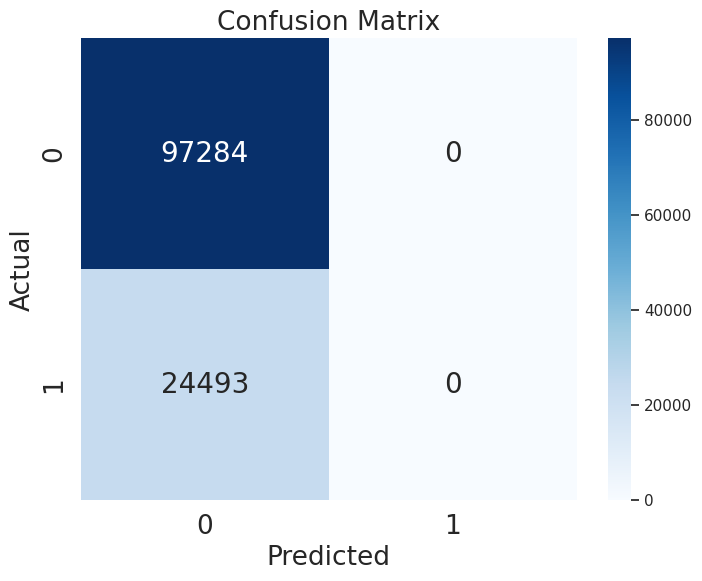

In [124]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", annot_kws={'size':20})
plt.title("Confusion Matrix", fontsize=19)
plt.xlabel("Predicted", fontsize=19)
plt.ylabel("Actual", fontsize=19)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.show()


Feature Importance

In [125]:
feature_importances = model.coef_[0]
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [126]:
importance_df

,Feature,Importance
0,customer_id,0.038972
20,Year_2020,0.018841
2,pincode,0.007582
1,age,0.006697
21,Year_2021,0.005615
16,telecom_partner_Airtel,0.004756
5,calls_made,0.004591
14,Gender_F,0.004516
7,data_used,0.004487
8,city_Bangalore,0.003241


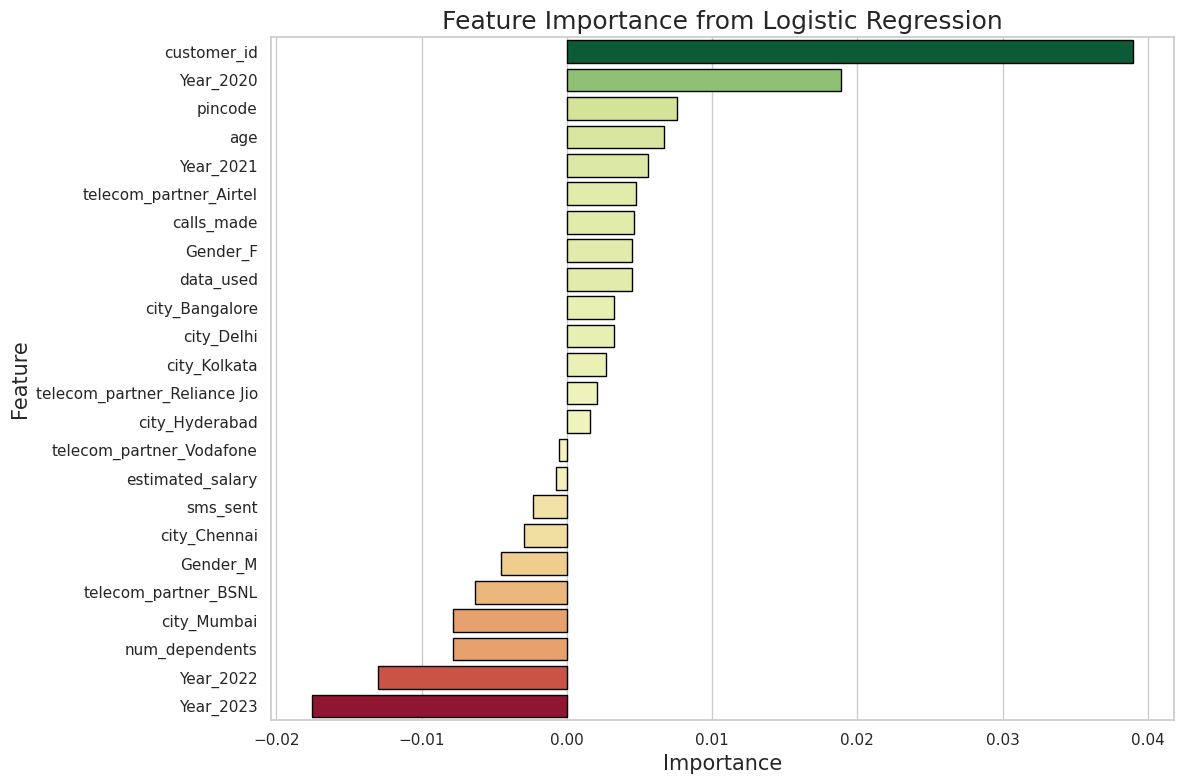

In [127]:
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid', color_codes=True)
norm = col.TwoSlopeNorm(vmin=importance_df.Importance.min(),
                        vcenter=0, vmax=importance_df.Importance.max())
color_s = [plt.cm.RdYlGn(norm(c)) for c in importance_df['Importance']]
ax = sns.barplot(x='Importance', y='Feature', data=importance_df, palette=color_s, edgecolor='black')
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.title('Feature Importance from Logistic Regression', fontsize=18)
plt.tight_layout()
plt.show()

Random forest classifier

In [128]:
x_train

array([[ 0.98867939, -0.06502468,  0.84139002, ..., -0.65614134,
         1.53906592, -0.33450912],
       [-1.056042  ,  0.54286136,  0.8741323 , ..., -0.65614134,
        -0.64974475, -0.33450912],
       [ 0.680208  , -1.22000814, -0.29972436, ..., -0.65614134,
         1.53906592, -0.33450912],
       ...,
       [ 0.14924874,  0.23891834, -0.44538578, ...,  1.52406188,
        -0.64974475, -0.33450912],
       [ 0.36161254,  0.60364996,  0.36303275, ..., -0.65614134,
         1.53906592, -0.33450912],
       [ 0.00742641,  1.63705622, -0.87560848, ...,  1.52406188,
        -0.64974475, -0.33450912]])

In [129]:
x_test

array([[ 1.55501602, -1.58473977, -1.01698143, ..., -0.65614134,
        -0.64974475,  2.98945515],
       [ 1.00315454,  1.3331132 ,  0.49850571, ..., -0.65614134,
         1.53906592, -0.33450912],
       [-1.45971095, -0.97685373,  1.10705133, ..., -0.65614134,
        -0.64974475, -0.33450912],
       ...,
       [-0.25407895,  1.02917019, -0.62717792, ...,  1.52406188,
        -0.64974475, -0.33450912],
       [ 0.41627115, -0.00423607,  0.2034252 , ..., -0.65614134,
         1.53906592, -0.33450912],
       [ 0.01143622, -0.67291071, -0.79817777, ...,  1.52406188,
        -0.64974475, -0.33450912]])

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [131]:
x_train.shape

(121776, 24)

In [132]:
x_test.shape

(121777, 24)

In [133]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [134]:
y_pred = rf_model.predict(x_test)

In [135]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 79.88454305821297

Confusion Matrix:
 [[97280     4]
 [24492     1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     97284
           1       0.20      0.00      0.00     24493

    accuracy                           0.80    121777
   macro avg       0.50      0.50      0.44    121777
weighted avg       0.68      0.80      0.71    121777



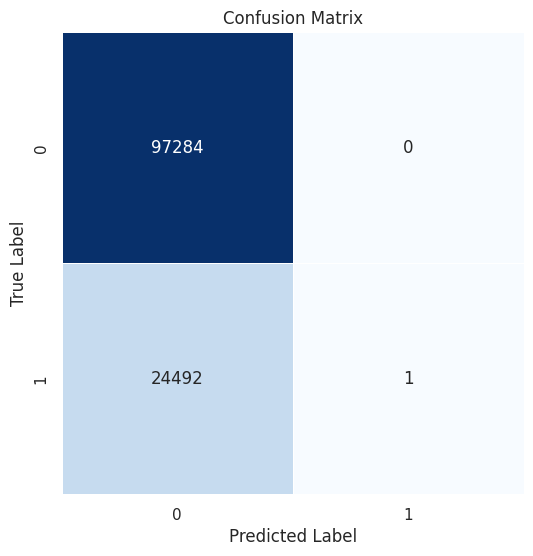

In [157]:
# Assuming you have y_test and y_pred from the previous steps
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Using** **Gradient** **Boost** **model**

In [166]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [167]:
x_train

array([[ 0.98867939, -0.06502468,  0.84139002, ..., -0.65614134,
         1.53906592, -0.33450912],
       [-1.056042  ,  0.54286136,  0.8741323 , ..., -0.65614134,
        -0.64974475, -0.33450912],
       [ 0.680208  , -1.22000814, -0.29972436, ..., -0.65614134,
         1.53906592, -0.33450912],
       ...,
       [ 0.14924874,  0.23891834, -0.44538578, ...,  1.52406188,
        -0.64974475, -0.33450912],
       [ 0.36161254,  0.60364996,  0.36303275, ..., -0.65614134,
         1.53906592, -0.33450912],
       [ 0.00742641,  1.63705622, -0.87560848, ...,  1.52406188,
        -0.64974475, -0.33450912]])

In [168]:
x_test

array([[ 1.55501602, -1.58473977, -1.01698143, ..., -0.65614134,
        -0.64974475,  2.98945515],
       [ 1.00315454,  1.3331132 ,  0.49850571, ..., -0.65614134,
         1.53906592, -0.33450912],
       [-1.45971095, -0.97685373,  1.10705133, ..., -0.65614134,
        -0.64974475, -0.33450912],
       ...,
       [-0.25407895,  1.02917019, -0.62717792, ...,  1.52406188,
        -0.64974475, -0.33450912],
       [ 0.41627115, -0.00423607,  0.2034252 , ..., -0.65614134,
         1.53906592, -0.33450912],
       [ 0.01143622, -0.67291071, -0.79817777, ...,  1.52406188,
        -0.64974475, -0.33450912]])

In [169]:
x_train.shape

(121776, 24)

In [170]:
x_test.shape

(121777, 24)

In [171]:
# Create an XGBoost classifier
xgb_model = XGBClassifier()
# Train the model
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [172]:
# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

In [173]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[97145   139]
 [24454    39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     97284
           1       0.22      0.00      0.00     24493

    accuracy                           0.80    121777
   macro avg       0.51      0.50      0.45    121777
weighted avg       0.68      0.80      0.71    121777



In [174]:
# Assuming DMatrix is your data structure
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Calculate the ratio of negative class to positive class
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Set scale_pos_weight
params = {'objective': 'binary:logistic', 'scale_pos_weight': ratio}
model = xgb.train(params, dtrain)

# Predict and evaluate
y_pred = model.predict(dtest)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.80      0.48      0.60     97284
           1       0.20      0.52      0.29     24493

    accuracy                           0.49    121777
   macro avg       0.50      0.50      0.44    121777
weighted avg       0.68      0.49      0.54    121777

